# Tarefa 08 - Parte 2

In [13]:
from PIL import Image as img
import matplotlib.pyplot as plt
import numpy as np
import math

In [14]:
brad = img.open("Brad.jpg")
papColorido = img.open("papagaio_colorido.jpg")
papMonocromatico = img.open("papagaio_monocromatico.jpg")

In [15]:
def plot(img1, img2):
    fig = plt.figure(figsize=(100,100))
    a=fig.add_subplot(1,3,1)
    imgplot = plt.imshow(img1)
    a.set_title('Imagem 1')

    a=fig.add_subplot(1,3,2)
    imgplot = plt.imshow(img2)
    imgplot.set_clim(0.0,0.7)
    a.set_title('Imagem 2')        

In [16]:
def componentesRGB(im):
    ig = im.copy()
    largura, altura = ig.size
    n = ig.load()
    R = []
    G = []
    B = []
    for x in range(largura):
        for y in range(altura):
            r,g,b = n[x,y]            
            R.append(r)
            G.append(g)
            B.append(b)
    return R,G,B

In [17]:
# Espelha imagem
def espelhar(im):
    ig = im.copy()
    largura, altura = ig.size
    new = img.new('RGB', (largura, altura), 'black')
    
    n1 = ig.load()
    n2 = new.load()
       
    for x in range(largura):
        for y in range(altura):
            n2[x,y] = n1[(largura-1)-x,y]     
    return new

In [18]:
# Funcao sigmoide
def sigmoideSig(x, largura):
    d = 36 / (largura / 2)
    x = -36 + (d * x)
    return 1 / (1 + math.exp(-x))

In [23]:
# Faz combinacao linear com coeficiente variável e funcao sigmoide
def combLinearSig(img1,img2):
    c = []
    ig1 = img1.copy()
    ig2 = img2.copy()
    largura, altura = ig1.size
    r,g,b = componentesRGB(ig1)
    R,G,B = componentesRGB(ig2)    
    new = img.new('RGB', (largura, altura), 'white')
    n = new.load()
    
    for x in range(largura):
        for y in range(altura):
            cx = sigmoideSig(x, largura)   
            n[x, y] = int((cx)*r[x*(altura)+y] + (1-(cx))*R[x*(altura)+y]), int((cx)*g[x*altura+y] + (1-(cx))*G[x*altura+y]), int((cx)*b[x*altura+y] + (1-(cx))*B[x*altura+y])
    return new

In [24]:
# Espelha imagem
bradEspelhada = espelhar(brad)

In [25]:
# Salva imagem espelhada
bradEspelhada.save("BradEspelhada.jpg")

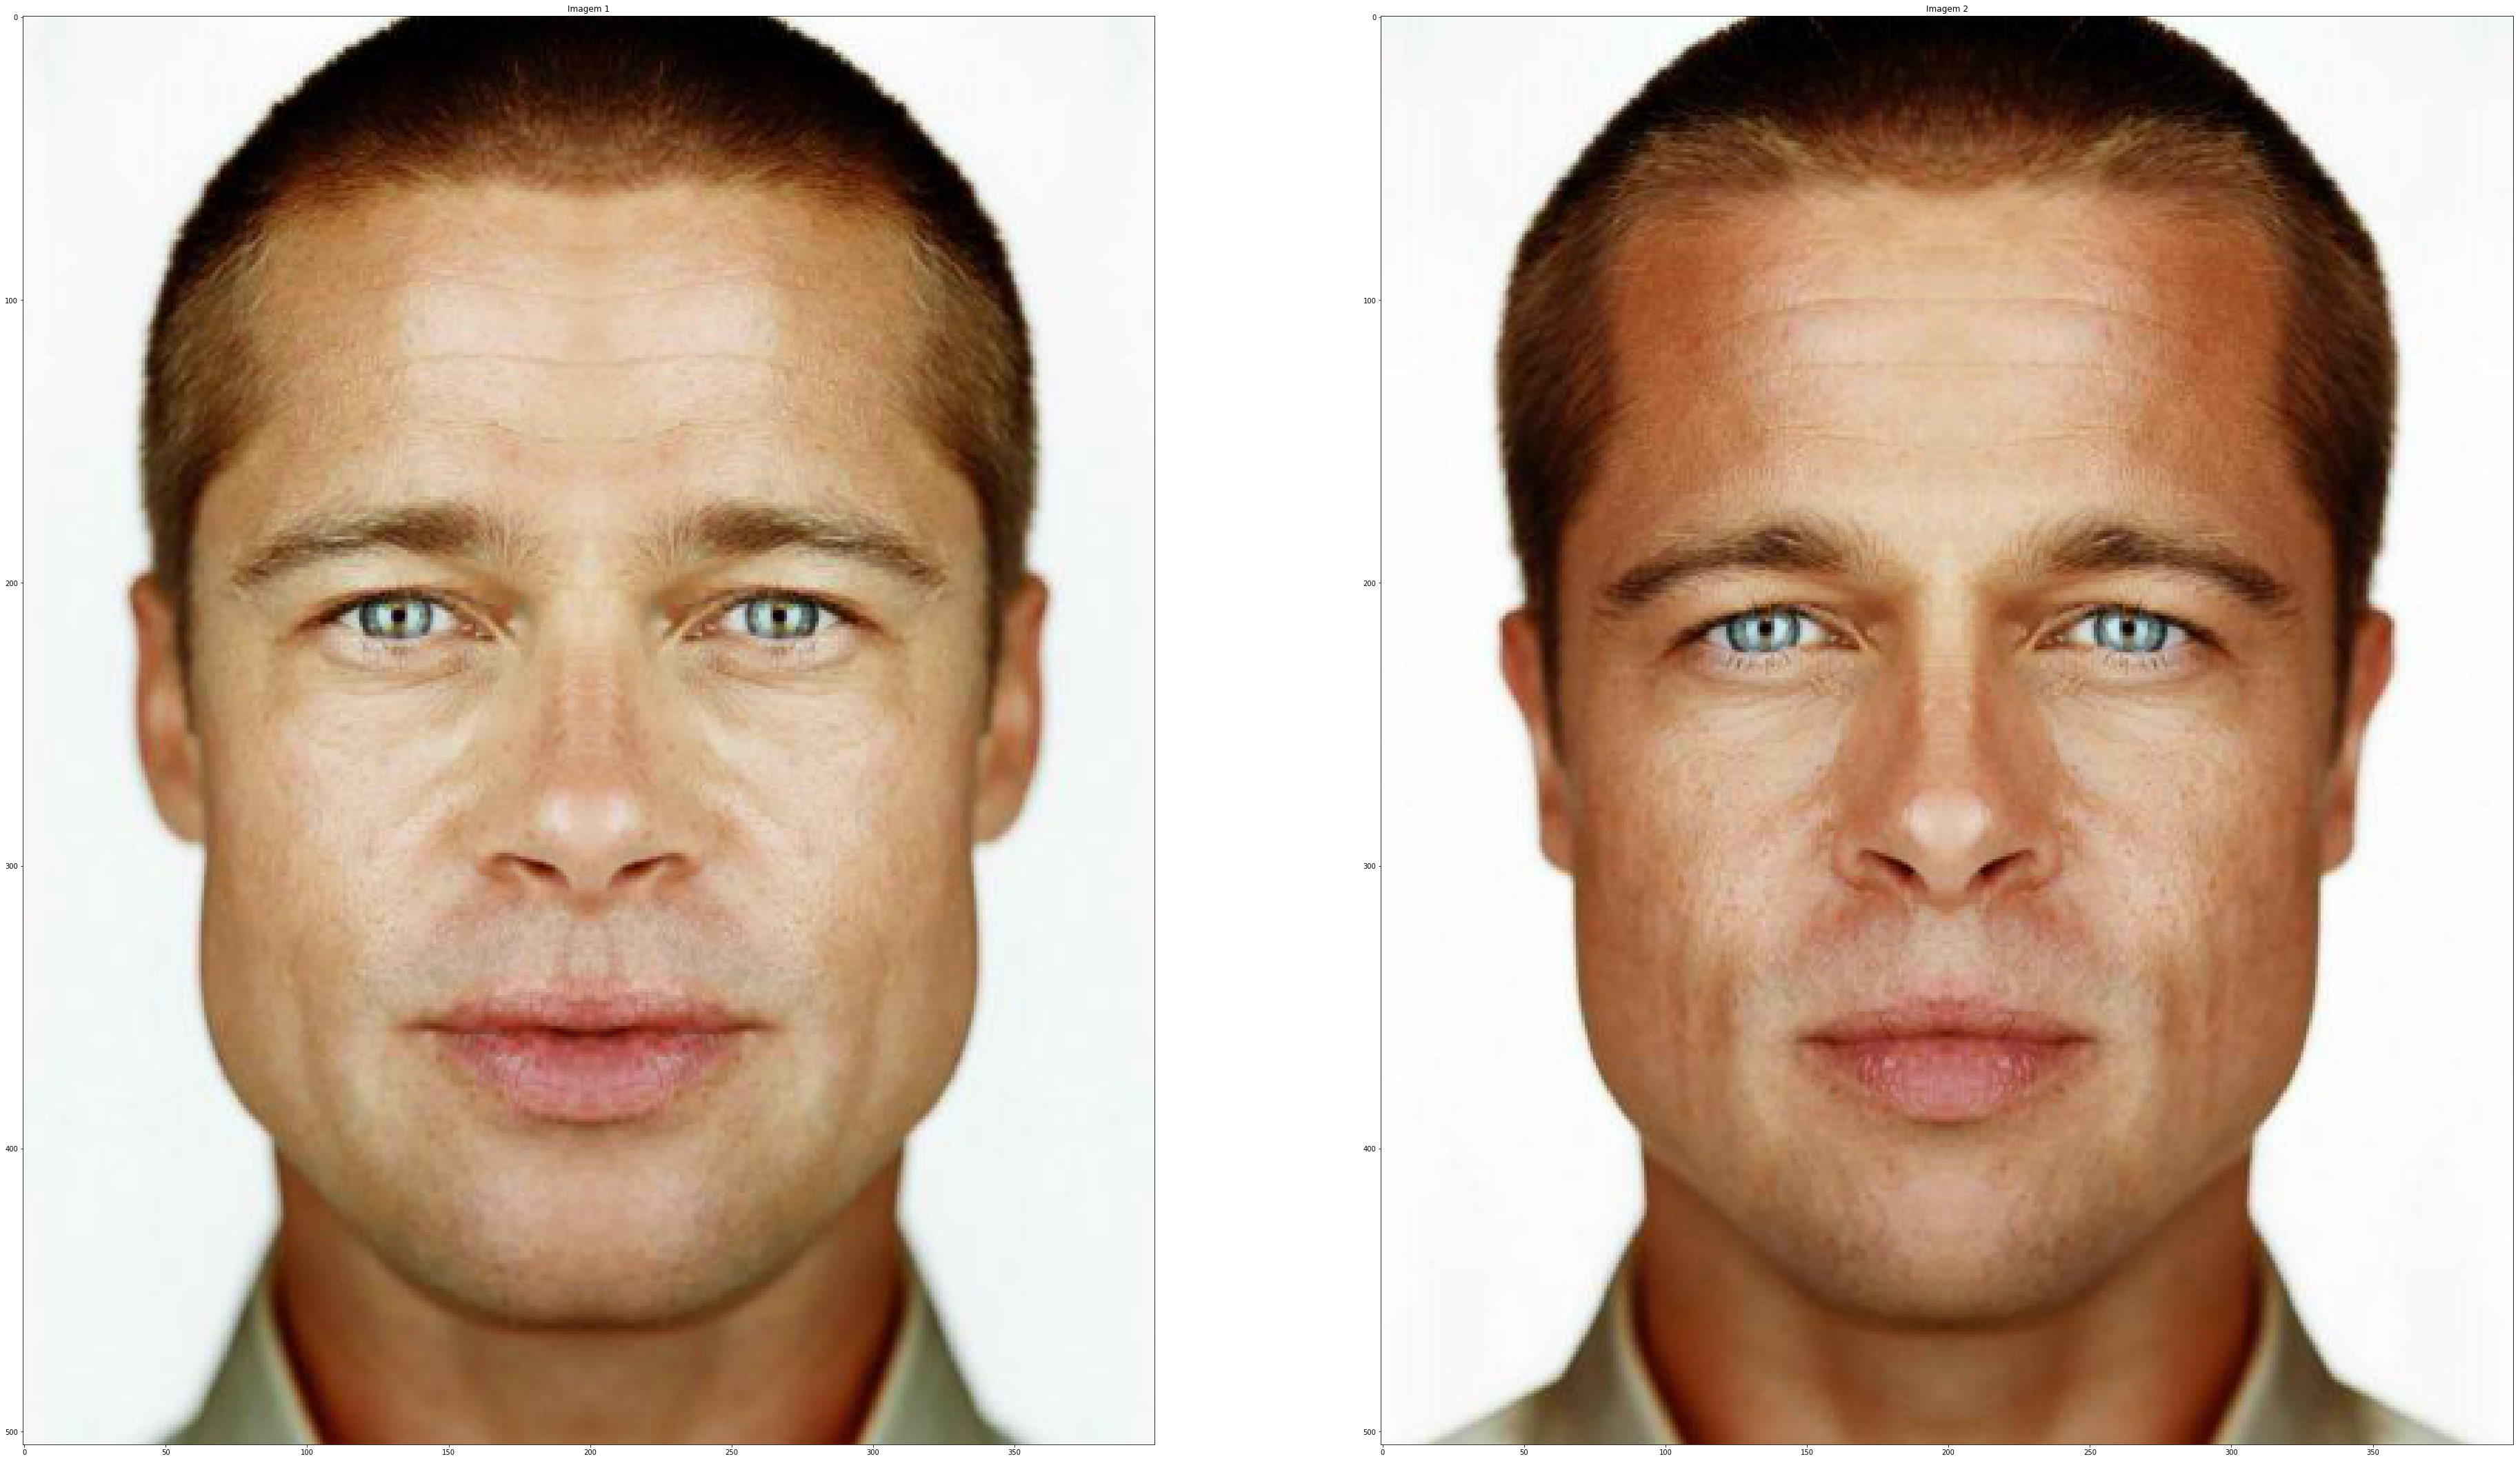

In [26]:
# Somas as imagens
bradFinal1 = combLinearSig(brad, bradEspelhada)
bradFinal2 = combLinearSig(bradEspelhada, brad)
plot(bradFinal1, bradFinal2)

## Salvando os arquivos:

In [27]:
bradFinal1.save("./resource/img/Tarefa08/parte02/brad_1.jpg")
bradFinal2.save("./resource/img/Tarefa08/parte02/brad_2.jpg")